# Problem 2.4


First, import necessary pakages and `.mat` data.

In [1]:
import numpy as np
from numpy.linalg import norm, inv
import scipy.io as sio
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

J = sio.loadmat('./data/pagerank_adj.mat')['J']
urls = pd.read_csv('./data/pagerank_urls.txt', header=None)

Convert the adjacency matrix `J` to like matrix `A`, and create vector `x` with all entries equal to one.

In [2]:
A = J / J.sum(axis=0, keepdims=True)
N = A.shape[0]
x = np.ones(N).reshape(-1, 1)

## (a)

Verify that wether all the sum of columns are equal to one. 

In [3]:
# Since there are some computation error in division,
# we use np.allclose to get the result.
if np.allclose(A.sum(axis=0), np.ones(N), rtol=1e-06, atol=1e-08):
    print('All the sum of columns are equal to one')

All the sum of columns are equal to one


The property of matrix `A` is called *column-stochastic.* Its all entries are non-negative and the sum of the entries in each column is equal to one. This makes sure that each page has at least one out-going link.

## (b)


Function to implement the pow method which depends on iteration as follow.

In [4]:
### =====================================
### Function for executing power method.
### Return the result x(k + 1) 
### lambda_ and error e(k + 1) 
### as lists of k iterations.
### =====================================
def pow_iter(matrix, x_iter, iteration=10):
    
    # convert as matrix
    matrix = np.matrix(matrix)
    x_iter = np.matrix(x_iter)
    
    x_list, lamb_list, e_list = [], [], []
    
    for k in range(iteration):
        y = matrix * x_iter # y(k + 1)
        x_iter = y / norm(y, ord=2) # x(k + 1)
        lamb = x_iter.H * A * x_iter # lambda(k + 1)
        
        # convert back and append
        x_list.append(np.asarray(x_iter))
        lamb_list.append(lamb.item())
        e_list.append(norm(matrix * x_iter - x_iter, ord=2))
    
    return x_list, lamb_list, e_list

Compute as $k = 10$ and plot the $e(k + 1)$ versus $k$ as follow:

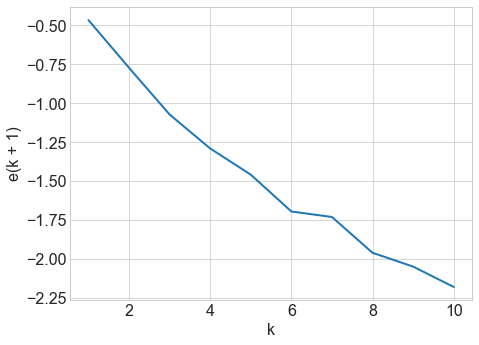

In [5]:
_, _, el = pow_iter(A, x, iteration=10)

# Plot the error results
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7.2, 5.4))
plt.plot(np.arange(len(el)) + 1, np.log(np.asarray(el)), lw=2.)
xlab = plt.xlabel('k')
ylab = plt.ylabel('e(k + 1)')

The above plot is the $\log(e(e + 1))$ versus $k$ with 10 iterations

## (c)

Now we first construct the function of shift-invert power method and make implementation

In [6]:
### =====================================
### Function for shift-invert power method.
### Return the result x(k + 1) 
### lambda_ and error e(k + 1) 
### as lists of k iterations.
### =====================================
def shiftinv_pow(matrix, x_iter, sigma, iteration=10):
    
    # Convert as matrix. Creart identity
    matrix = np.matrix(matrix)
    x_iter = np.matrix(x_iter)
    iden = np.matrix(np.identity(N))
    
    x_list, lamb_list, e_list = [], [], []

    for k in range(iteration):
        y = (matrix - sigma * iden).I * x_iter # y(k + 1)
        x_iter = y / norm(y, ord=2) # x(k + 1)
        lamb = x_iter.H * matrix * x_iter # lambda(k + 1)
        
        # convert back and append
        x_list.append(np.asarray(x_iter))
        lamb_list.append(lamb.item())
        e_list.append(norm(matrix * x_iter - x_iter, ord=2))
    
    return x_list, lamb_list, e_list

# Compute the error of shift-invert power methods with 10 iterations
xl_shiftinv, lambl_shiftinv, el_shiftinv = shiftinv_pow(A, x, sigma=.99, iteration=10)

Then, construct the function of Rayleigh quotient iteration and make implementation.

In [7]:
### =====================================
### Function for Rayleigh quotient.
### Return the result x(k + 1) 
### lambda_ and error e(k + 1) 
### as lists of k iterations.
### =====================================
def rayleigh_iter(matrix, x_iter, sigma_iter, iteration=10):
    
    # Convert as matrix. Creart identity
    matrix = np.matrix(matrix)
    x_iter = np.matrix(x_iter)
    iden = np.matrix(np.identity(N))
    # Computer for iteration
    x_list, lamb_list, e_list = [], [], []

    for k in range(iteration):
        
        if k < 2:
            sigma = sigma_iter
        else:            
            sigma =  ((x_iter.H * matrix * x_iter) / (x_iter.H * x_iter)).item()
        
        y = (matrix - sigma * iden).I * x_iter # y(k + 1)
        x_iter = y / norm(y, ord=2) # x(k + 1)
        lamb = x_iter.H * matrix * x_iter # lambda(k + 1)
        
        # convert back and append
        x_list.append(np.asarray(x_iter))
        lamb_list.append(lamb.item())
        e_list.append(norm(matrix * x_iter - x_iter, ord=2))
    
    return x_list, lamb_list, e_list

# Compute the error of Rayleigh quotient methods with 10 iterations
xl_rayleigh, lambl_rayleigh, el_rayleigh = rayleigh_iter(A, x, sigma_iter=.99, iteration=10)

Then, we plot $\log(e(k + 1))$ of three different algorithms.

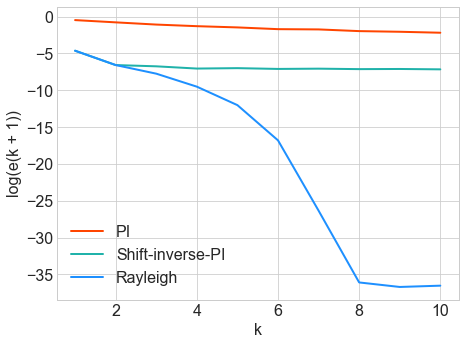

In [8]:
# Plot results
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7.2, 5.4))
plt.plot(np.arange(len(el)) + 1, np.log(np.asarray(el)),
         lw=2., color='#FF4500', label='PI')
plt.plot(np.arange(len(el_shiftinv)) + 1, np.log(np.asarray(el_shiftinv)),
         lw=2., color='#20B2AA', label='Shift-inverse-PI')
plt.plot(np.arange(len(el_rayleigh)) + 1, np.log(np.asarray(el_rayleigh)),
         lw=2., color='#1E90FF', label='Rayleigh')
xlab = plt.xlabel('k')
ylab = plt.ylabel('log(e(k + 1))')
plgd = plt.legend(loc='best')

As we can see, similar to the results in Example 7.1, the error of the power method decreases slowest with respect to  $k$. The error of the shift-inverse power method decreases more efficiency with respect to  $k$ than the normal power method. By Rayleigh quotient method, the error shrinks rapidly and gets a lower convergence.  

## (d)

Compute all the eigenvalues as folows. We just use the eigenvector computed with the last iteration of Shift Inverse Power Iterarion method and list the web pages as follow.

In [9]:
lamb_final = lambl_shiftinv[-1]
pagescore = xl_shiftinv[-1]
pagescore = pagescore / pagescore.sum()

print('Greatest eigenvalue of the last iteration of Rayleigh: {:.2f}'.format(lamb_final))

Greatest eigenvalue of the last iteration of Rayleigh: 1.00


In [10]:
ind = np.argsort(pagescore, axis=0)


print('Top five Pagerank pairs:\n')
for i in range(-1, -6, -1):
    ind_i = ind[i].item()
    print('Page index: {:4d} with score: {:.2e}'.format(ind_i + 1, pagescore[ind_i].item()))
    print('url: {:s}\n'.format(urls.iloc[ind_i][0]))

print('Bottom five Pagerank pairs:\n')
for i in range(5):
    ind_i = ind[i].item()
    print('Page index: {:4d}'.format(ind_i + 1))
    print('url: {:s}\n'.format(urls.iloc[ind_i][0]))

Top five Pagerank pairs:

Page index:    2 with score: 6.75e-02
url: http://www.hollins.edu/

Page index:   35 with score: 5.79e-02
url: http://www.hollins.edu/admissions/visit/visit.htm

Page index:   36 with score: 5.41e-02
url: http://www.hollins.edu/about/about_tour.htm

Page index:   58 with score: 5.28e-02
url: http://www.hollins.edu/htdig/index.html

Page index:   49 with score: 4.79e-02
url: http://www.hollins.edu/admissions/info-request/info-request.cfm

Bottom five Pagerank pairs:

Page index:  424
url: http://www1.hollins.edu/homepages/hammerpw/qrhomepage.htm

Page index:  987
url: http://www1.hollins.edu/homepages/hammerpw/qrcourses2.htm

Page index:  986
url: http://www1.hollins.edu/homepages/hammerpw/qrcourses.htm

Page index:  985
url: http://www1.hollins.edu/homepages/hammerpw/qractivities.htm

Page index:  930
url: http://www1.hollins.edu/homepages/godardrd/homepage.htm



Since these pages has a number of sublinks that re-direct to themselves, *i.e.* they are most trustable, they have higher page scores, which seems consistent with my surmise.